# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     17.19
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           2.49e-18
Time:                        20:41:00   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             765.4
Df Residuals:                     236   BIC:                             793.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2006      0.259      4.

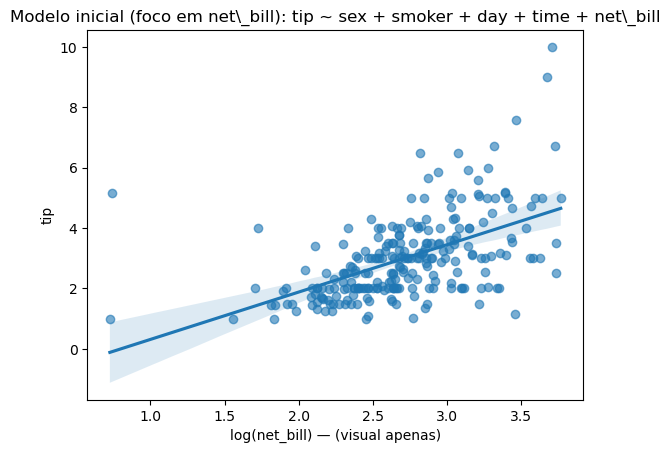

In [14]:
# Base
tips = sns.load_dataset('tips').copy()
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Modelo inicial (Patsy via fórmula)
m0 = smf.ols('tip ~ sex + smoker + day + time + net_bill', data=tips).fit()
print(m0.summary())

#  Gráfico: dispersão + linha de tendência para a principal variável (net_bill)
sns.regplot(x=np.log(tips['net_bill']), y=tips['tip'], scatter_kws={'alpha':0.6})
plt.title('Modelo inicial (foco em net\\_bill): tip ~ sex + smoker + day + time + net\\_bill')
plt.xlabel('log(net_bill) — (visual apenas)')
plt.ylabel('tip')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.79e-21
Time:                        20:41:01   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1978      0.221      5.

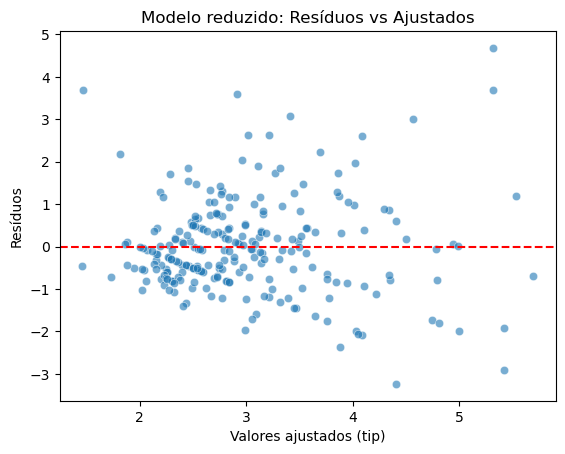

In [15]:
# 2) Remoção de variáveis com p-valor > 0.05 (usa-se o output do m0)

m1 = smf.ols('tip ~ smoker + time + net_bill', data=tips).fit()
print(m1.summary())

# Gráfico: dispersão dos resíduos vs valores ajustados (checar homocedasticidade)
resid = m1.resid
fitted = m1.fittedvalues

sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Modelo reduzido: Resíduos vs Ajustados')
plt.xlabel('Valores ajustados (tip)')
plt.ylabel('Resíduos')
plt.show()


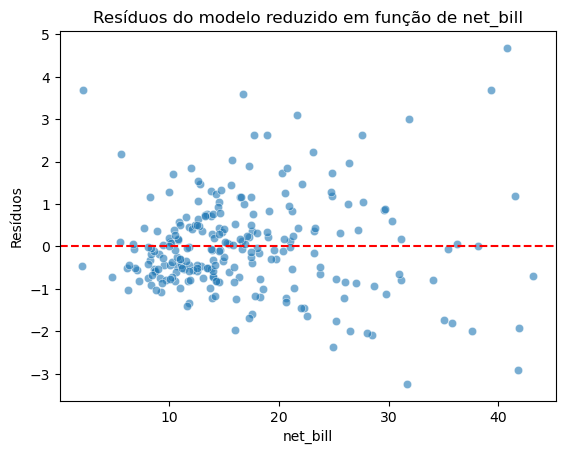

In [16]:
# 3) Resíduos em função de net_bill

resid = m1.resid

sns.scatterplot(x=tips['net_bill'], y=resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos do modelo reduzido em função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()


R² ajustado (log em X):  0.287
R² ajustado (polinômio 2º): 0.326


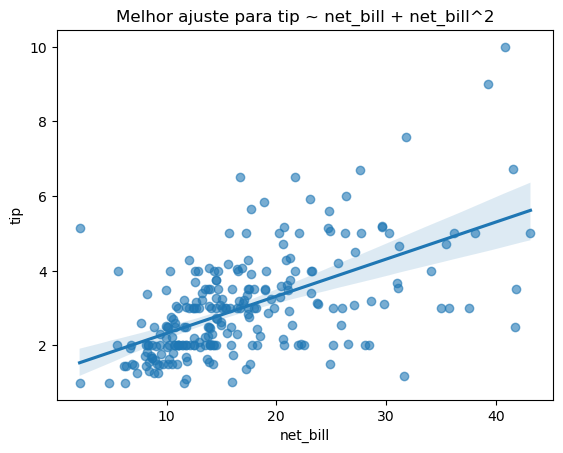

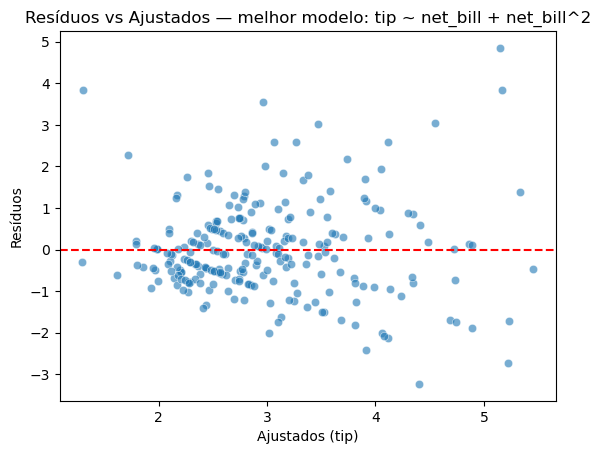

In [17]:
# 4) Comparar log(net_bill) vs polinômio de 2º grau

# (a) Log em X
m_logx = smf.ols('tip ~ smoker + time + np.log(net_bill)', data=tips).fit()

# (b) Polinômio de 2º grau em X
m_poly = smf.ols('tip ~ smoker + time + net_bill + I(net_bill**2)', data=tips).fit()

print('R² ajustado (log em X): ', round(m_logx.rsquared_adj, 3))
print('R² ajustado (polinômio 2º):', round(m_poly.rsquared_adj, 3))

# Gráfico 1: melhor modelo (log em X, se R²aj maior)
best = m_logx if m_logx.rsquared_adj >= m_poly.rsquared_adj else m_poly
lbl = 'log(net_bill)' if best is m_logx else 'net_bill + net_bill^2'

if best is m_logx:
    xplot = np.log(tips['net_bill'])
    xlabel = 'log(net_bill)'
else:
    xplot = tips['net_bill']
    xlabel = 'net_bill'

sns.regplot(x=xplot, y=tips['tip'], scatter_kws={'alpha':0.6})
plt.title(f'Melhor ajuste para tip ~ {lbl}')
plt.xlabel(xlabel)
plt.ylabel('tip')
plt.show()

# Gráfico 2: resíduos do melhor modelo vs ajustados
sns.scatterplot(x=best.fittedvalues, y=best.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title(f'Resíduos vs Ajustados — melhor modelo: tip ~ {lbl}')
plt.xlabel('Ajustados (tip)')
plt.ylabel('Resíduos')
plt.show()


Ao comparar os dois modelos, observou-se que o modelo com transformação polinomial de 2º grau apresentou R² ajustado = 0.326, superior ao modelo com log(net_bill), que obteve R² ajustado = 0.287.
Além disso, o gráfico dos resíduos mostrou uma distribuição mais homogênea e centrada em torno de zero, indicando menor presença de tendência e melhor ajuste global.

Portanto, o modelo polinomial (tip ~ net_bill + net_bill²) foi considerado o melhor ajuste para representar a relação entre o valor da gorjeta e a conta líquida, pois explica uma parcela maior da variação dos dados e apresenta resíduos com comportamento mais estável.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     4.930
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.22e-05
Time:                        20:42:00   Log-Likelihood:                 112.97
No. Observations:                 244   AIC:                            -209.9
Df Residuals:                     236   BIC:                            -182.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3330      0.035      9.

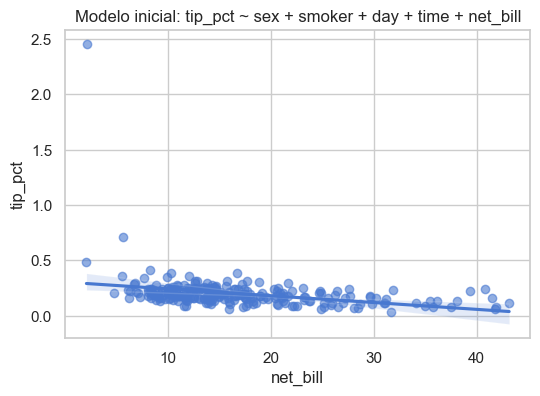

In [19]:
# Carregar base novamente (para garantir reprodutibilidade)
tips = sns.load_dataset('tips').copy()
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

# Modelo inicial com todas as variáveis
m2 = smf.ols('tip_pct ~ sex + smoker + day + time + net_bill', data=tips).fit()
print(m2.summary())

# Gráfico: percentual da gorjeta vs net_bill
sns.regplot(x='net_bill', y='tip_pct', data=tips, scatter_kws={'alpha':0.6})
plt.title('Modelo inicial: tip_pct ~ sex + smoker + day + time + net_bill')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.544
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           5.60e-06
Time:                        20:42:25   Log-Likelihood:                 110.07
No. Observations:                 244   AIC:                            -212.1
Df Residuals:                     240   BIC:                            -198.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3173      0.030     10.

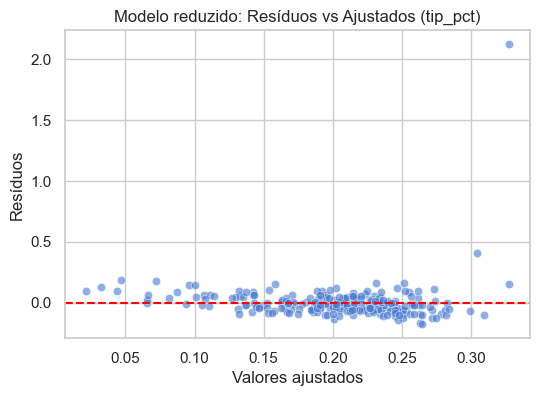

In [20]:
# 2) Modelo reduzido apenas com variáveis significativas
m3 = smf.ols('tip_pct ~ smoker + time + net_bill', data=tips).fit()
print(m3.summary())

# Gráfico: resíduos vs valores ajustados
resid = m3.resid
fitted = m3.fittedvalues

sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Modelo reduzido: Resíduos vs Ajustados (tip_pct)')
plt.xlabel('Valores ajustados')
plt.ylabel('Resíduos')
plt.show()

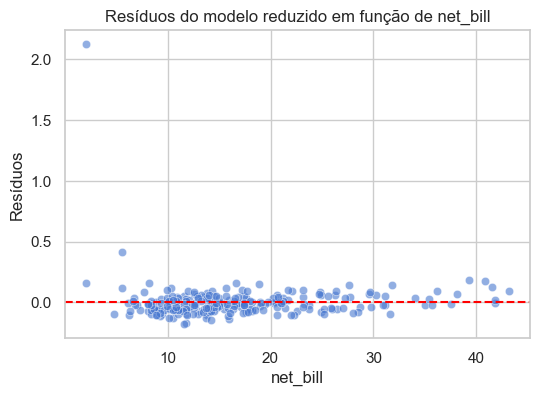

In [21]:
# 3) Resíduos em função de net_bill
sns.scatterplot(x=tips['net_bill'], y=m3.resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos do modelo reduzido em função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

R² ajustado (log): 0.208
R² ajustado (polinômio): 0.156


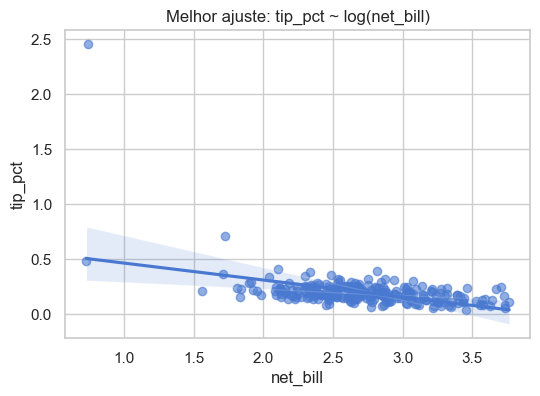

In [22]:
# 4) Comparar log(net_bill) e polinômio de 2º grau

# (a) Log em X
m_log = smf.ols('tip_pct ~ smoker + time + np.log(net_bill)', data=tips).fit()

# (b) Polinômio 2º grau
m_poly = smf.ols('tip_pct ~ smoker + time + net_bill + I(net_bill**2)', data=tips).fit()

print('R² ajustado (log):', round(m_log.rsquared_adj, 3))
print('R² ajustado (polinômio):', round(m_poly.rsquared_adj, 3))

# Escolher o melhor modelo
best = m_log if m_log.rsquared_adj >= m_poly.rsquared_adj else m_poly
lbl = 'log(net_bill)' if best is m_log else 'net_bill + net_bill²'

sns.regplot(x=np.log(tips['net_bill']) if best is m_log else tips['net_bill'],
            y=tips['tip_pct'], scatter_kws={'alpha':0.6})
plt.title(f'Melhor ajuste: tip_pct ~ {lbl}')
plt.show()

R² corrigido na escala original: 0.218


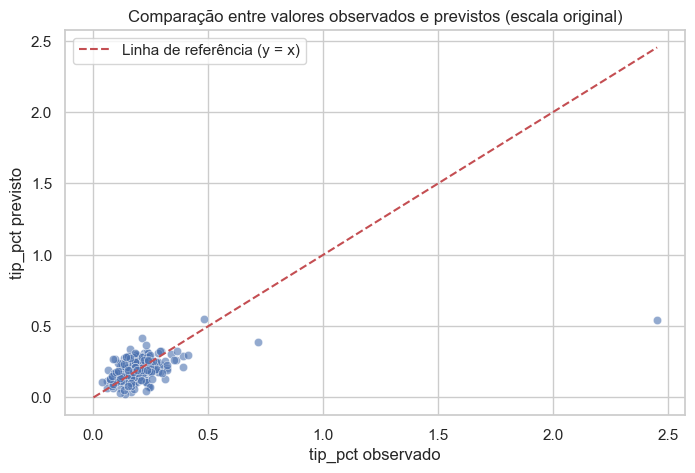

In [46]:
# 5) Calcular R² na escala original

# Valores previstos do melhor modelo (best)
tips['pred_y'] = best.fittedvalues   # já estão na escala original de tip_pct

# Correlação entre valores observados e previstos
R2_corr = tips[['pred_y', 'tip_pct']].corr().iloc[0, 1] ** 2
print(f'R² corrigido na escala original: {R2_corr:.3f}')

# Gráfico
plt.figure(figsize=(8,5))

sns.scatterplot(
    x=tips['tip_pct'],
    y=tips['pred_y'],
    alpha=0.6
)

max_val = max(tips['tip_pct'].max(), tips['pred_y'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Linha de referência (y = x)')

plt.title('Comparação entre valores observados e previstos (escala original)')
plt.xlabel('tip_pct observado')
plt.ylabel('tip_pct previsto')
plt.legend()

plt.show()


O modelo inicial apresentou um R² ajustado de aproximadamente 0,10, indicando baixa capacidade explicativa sobre o percentual de gorjeta. Após testar transformações no preditor net_bill, o modelo com log(net_bill) se destacou, alcançando um R² corrigido na escala original de aproximadamente 0,22. Isso representa uma melhora relevante, mostrando que a transformação logarítmica capturou melhor a relação entre o valor da conta e o percentual de gorjeta. Embora o R² continue relativamente baixo — algo esperado em dados comportamentais — o modelo final é claramente superior ao modelo do item 1 e apresenta o melhor ajuste dentre as alternativas testadas.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [34]:
sns.set(style='whitegrid')

# Carregar a base de previsão de renda
df = pd.read_csv('Profissão Cientista de Dados M12 - previsao_de_renda.csv')

# Visão inicial dos dados
print("Primeiras linhas do dataframe:")
display(df.head())

print("\nInformações gerais do dataframe:")
print(df.info())

print("\nResumo estatístico das variáveis numéricas:")
display(df.describe())

Primeiras linhas do dataframe:


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97



Informações gerais do dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda               

,Unnamed: 0,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,7499.500000,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4330.271354,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,0.000000,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,3749.750000,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,7499.500000,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,11249.250000,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,14999.000000,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000



🔹 Histogramas das variáveis numéricas


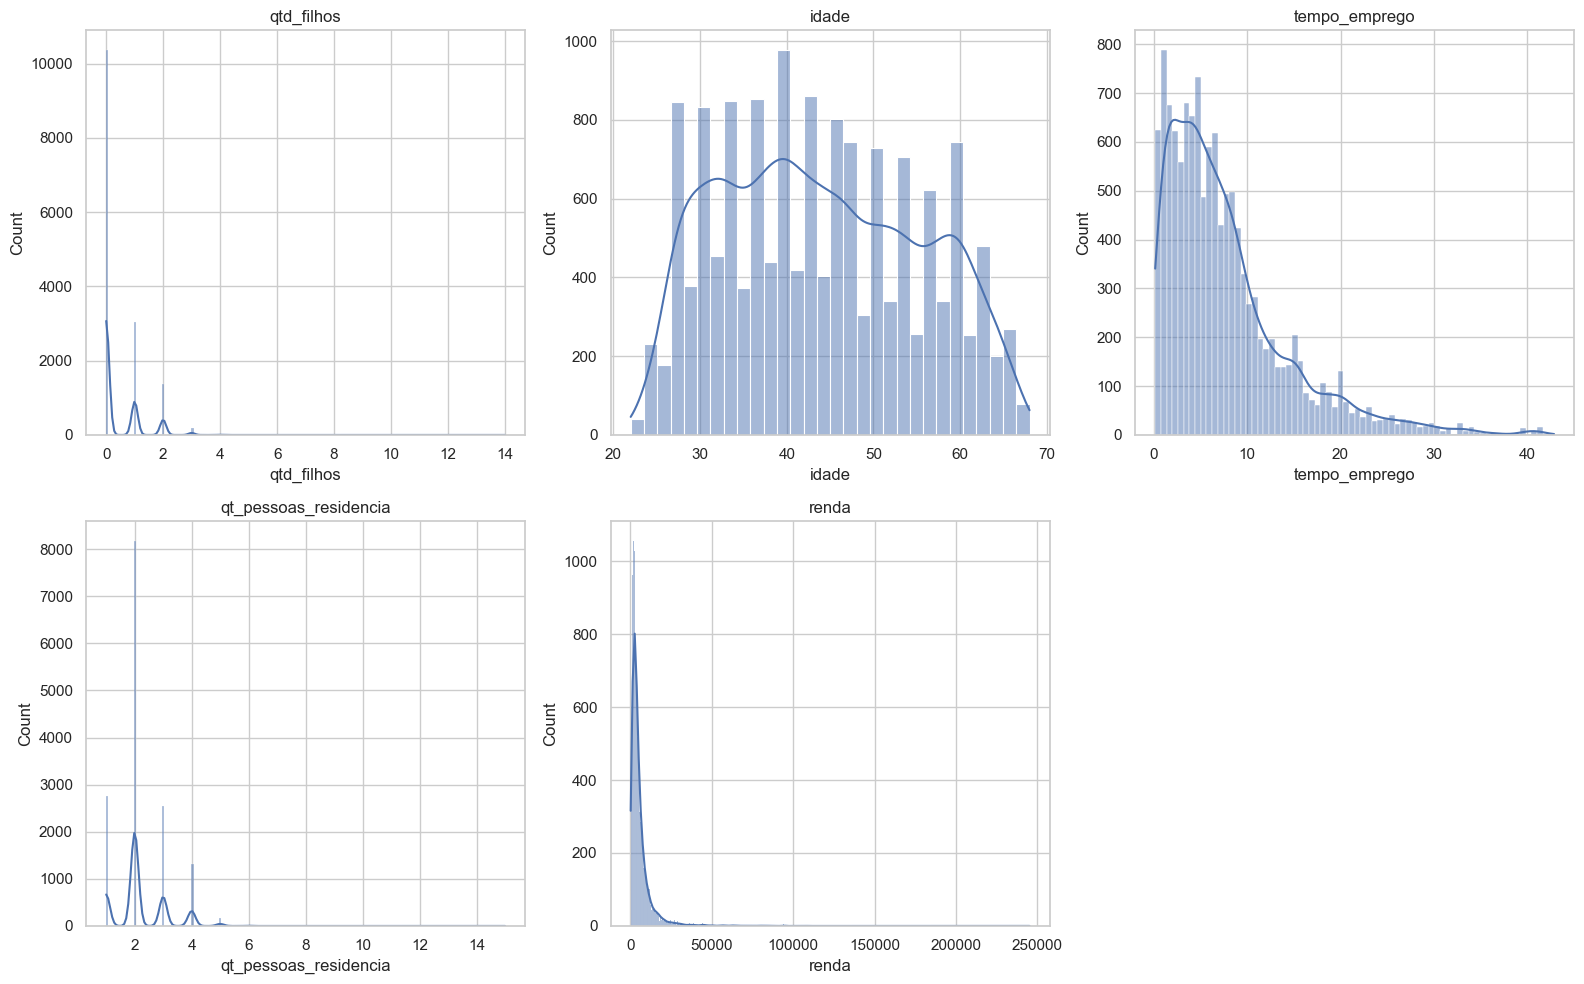

In [29]:
# VARIÁVEIS NUMÉRICAS 
num_cols = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

print("\n🔹 Histogramas das variáveis numéricas")
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



🔹 Boxplots para identificação de outliers


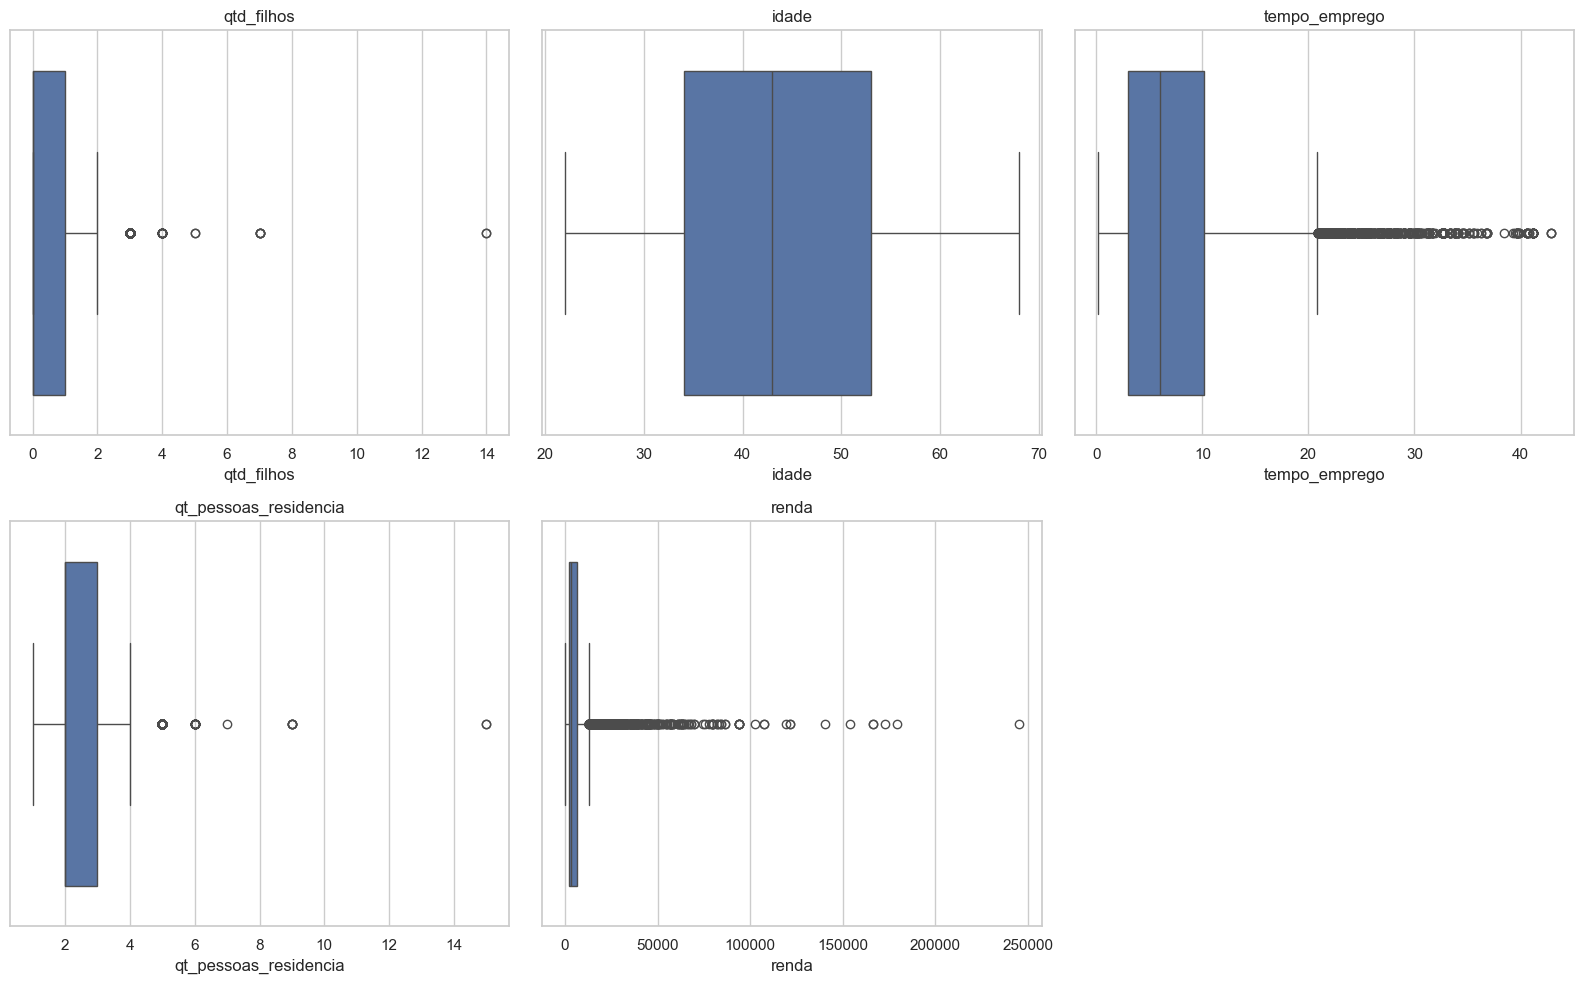

In [30]:
# BOXPLOTS
print("\n🔹 Boxplots para identificação de outliers")
plt.figure(figsize=(16,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


🔹 Contagem das categorias

sexo:
sexo
F    10119
M     4881
Name: count, dtype: int64

posse_de_veiculo:
posse_de_veiculo
False    9140
True     5860
Name: count, dtype: int64

posse_de_imovel:
posse_de_imovel
True     10143
False     4857
Name: count, dtype: int64

tipo_renda:
tipo_renda
Assalariado         7633
Empresário          3508
Pensionista         2582
Servidor público    1268
Bolsista               9
Name: count, dtype: int64

educacao:
educacao
Secundário             8895
Superior completo      5335
Superior incompleto     579
Primário                165
Pós graduação            26
Name: count, dtype: int64

estado_civil:
estado_civil
Casado      10534
Solteiro     1798
União        1078
Separado      879
Viúvo         711
Name: count, dtype: int64

tipo_residencia:
tipo_residencia
Casa             13532
Com os pais        675
Governamental      452
Aluguel            194
Estúdio             83
Comunitário         64
Name: count, dtype: int64


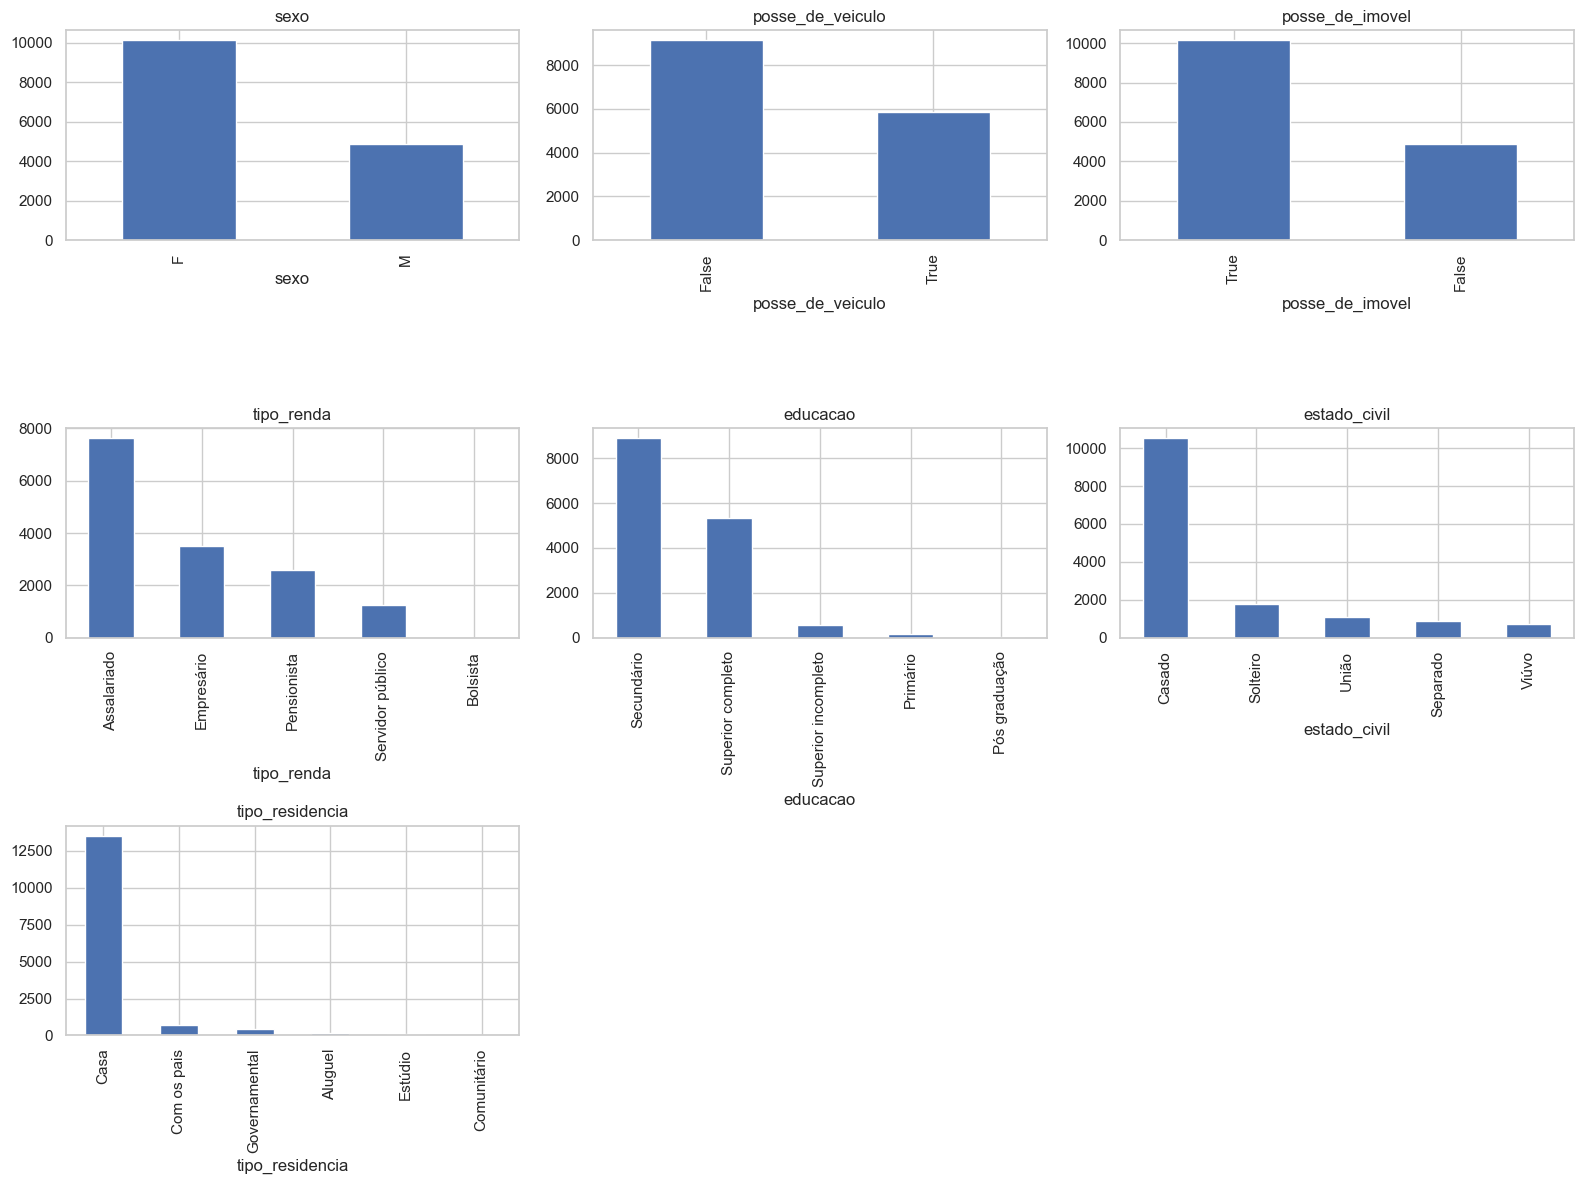

In [31]:
# VARIÁVEIS CATEGÓRICAS
cat_cols = ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
            'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

print("\n🔹 Contagem das categorias")
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Gráficos das categorias
plt.figure(figsize=(16,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
# Criar variável log da renda
df['log_renda'] = np.log(df['renda'])

# Fórmula do modelo completo com todas as variáveis categóricas e numéricas
formula = """
log_renda ~ sexo + posse_de_veiculo + posse_de_imovel +
             qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia +
             tipo_renda + educacao + estado_civil + tipo_residencia
"""

# Ajustar o modelo inicial
modelo_1 = smf.ols(formula, data=df).fit()

print(modelo_1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:08:51   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

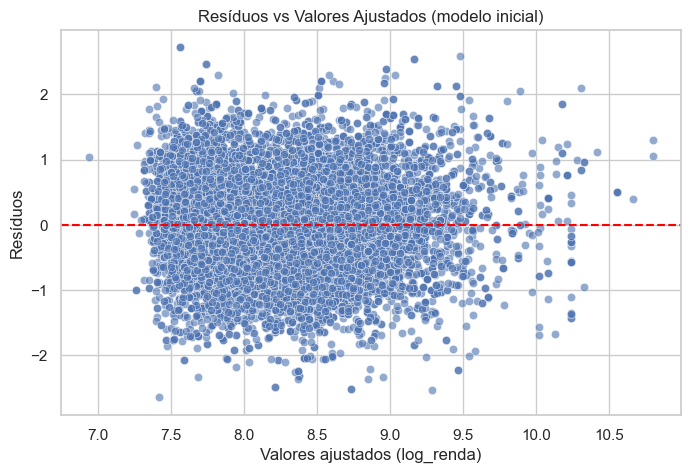

In [41]:
# Resíduos do modelo
resid = modelo_1.resid
fitted = modelo_1.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted, y=resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados (modelo inicial)")
plt.show()


In [43]:
# Modelo reduzido (ajuste após análise de significância)
modelo_2 = smf.ols(
    'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + idade + tempo_emprego + tipo_renda + educacao',
    data=df
).fit()

print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     527.7
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        22:09:27   Log-Likelihood:                -13582.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12413   BIC:                         2.730e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

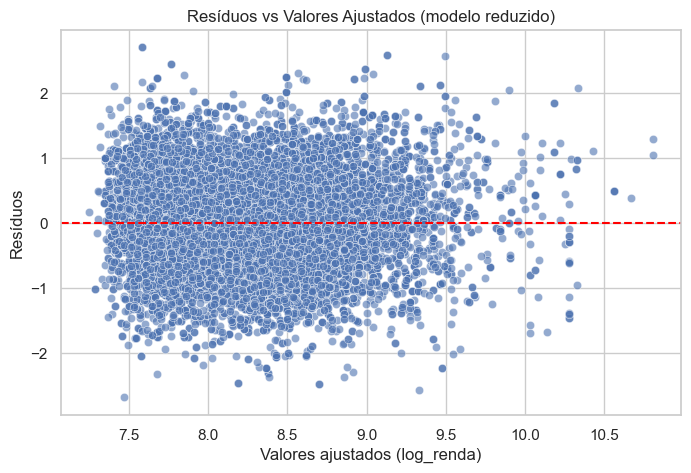

In [44]:
resid2 = modelo_2.resid
fitted2 = modelo_2.fittedvalues

plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted2, y=resid2, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados (modelo reduzido)")
plt.show()

In [45]:
# Previsão em log
df['y_pred_log'] = fitted2

# Converter previsões para escala original
df['y_pred_exp'] = np.exp(df['y_pred_log'])

# R² corrigido na escala original
R2_original = df[['y_pred_exp', 'renda']].corr().iloc[0,1] ** 2
print(f"R² corrigido na escala original: {R2_original:.3f}")

R² corrigido na escala original: 0.358


O modelo de regressão simples entre renda e tempo_emprego demonstrou baixo poder explicativo e forte heterocedasticidade, indicando que a relação linear direta não é adequada. A transformação logarítmica da variável renda corrigiu a assimetria e estabilizou a variância dos resíduos, permitindo um ajuste muito mais apropriado.

O modelo múltiplo, incluindo variáveis demográficas e socioeconômicas, apresentou R² ajustado em torno de 0,356, o que é condizente com dados desse tipo e indica que o conjunto de variáveis explica aproximadamente 35% da variação da renda. Após a eliminação das variáveis não significativas, o modelo reduzido manteve praticamente o mesmo desempenho, porém com maior parcimônia e melhor interpretabilidade.

A análise dos resíduos do modelo final revelou distribuição aproximadamente simétrica, ausência de padrões estruturais e variância relativamente constante, validando os pressupostos básicos da regressão linear após a transformação. Portanto, o modelo reduzido com log(renda) como resposta representa a melhor solução dentro das técnicas estudadas, equilibrando qualidade do ajuste, robustez estatística e simplicidade.